## Client Side VoWiFi Evaluation

The files that have been used to conduct our client side analysis are included as a zip file
`dumps.zip` (use git lfs to clone this repository)

The extraction step may take a few minutes!

In [8]:
# General Settings

# Will extract the zipfile to the current folder inside the repository
DUMPS_FOLDER="./"

# Enables autoreload extension to reload files on imports
#%load_ext autoreload
#%autoreload 2

In [4]:
# MAY TAKE A FEW MINUTES (many small files ~2mins)
# Extract the files included in the zip file to dumps
import zipfile
import os

# Define the path to the zip file
zip_file_path = 'dumps.zip'

# Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents of the zip file to the specified directory
    zip_ref.extractall(DUMPS_FOLDER)

print("Unzipping complete!")

Unzipping complete!


In [4]:
# FOLDER AND FILE STRUCTURE(included in dumps.zip)

## APPLE
#Folders
APPLE_FOLDER=DUMPS_FOLDER+"dumps/20240201_Apple/"
APPLE_FOLDER_DATA=DUMPS_FOLDER+"/dumps/20240201_Apple/data/"
APPLE_EVALUATION_FOLDER="evaluation/APPLE/"

#Files
APPLE_IPCC_URLS=APPLE_FOLDER_DATA+"ipcc_urls.txt"
APPLE_IPCC_CARRIERS_REPRODUCE=APPLE_FOLDER+"/ipcc_carriers_reproduce.txt"
APPLE_IPPC_EVALUATION_RESULTS_REPRODUCE=APPLE_EVALUATION_FOLDER+"apple_ike_configuration_parameters_reproduce.json"
APPLE_IPPC_UPDATE_TIMES_REPRODUCE=APPLE_EVALUATION_FOLDER+"config_dirs_update_time_reproduce.json"
APPLE_IPCC_FILES=APPLE_FOLDER+"data/"

## SAMSUNG
#Folders
SAMSUNG_FOLDER=DUMPS_FOLDER+"dumps/Samsung_Clientside/"
SAMSUNG_EVALUATION_FOLDER="evaluation/SAMSUNG/"
#Files
SAMSUNG_APN_FILE=SAMSUNG_FOLDER+"epdg_apns_conf.xml"
SAMSUNG_APN_EVALUATION_RESULTS_REPRODUCE=SAMSUNG_EVALUATION_FOLDER+"samsung_ikev2_conf_reproduce.json"

## XIAOMI
#Folders
XIAOMI_FOLDER=DUMPS_FOLDER+"dumps/20230822_Xiaomi_13_Pro_0A_SM8550-AB/"
MBN_EVALUATION_FOLDER="evaluation/MBN/"

#Files
XAOMI_EVALUATION_RESULTS_REPRODUCE=MBN_EVALUATION_FOLDER+"mbn_xiaomi_configuration_parameters_reproduce.json"


## OPPO
#Folders
OPPO_FOLDER=DUMPS_FOLDER+"dumps/20231206_Oppo_Find_X6_Pro_5G_0A_SM8550-AB/"

#Files
OPPO_EVALUATION_RESULTS_REPRODUCE=MBN_EVALUATION_FOLDER+"mbn_oppo_ikev2_configuration_parameters_reproduce.json"



### Apple

Apple uses iOS Carrier Profiles (IPCC) to configure iPhones for mobile networks. We relied on ipcc-downloader (https://github.com/mrlnc/ipcc-downloader) to extract the IPCC bundles. 

Dumps.zip includes the downloaded IPCC carrier profiles and the ipcc_urls.txt which is the log of the URLS where IPCC bundles were downloaded from. 


In [35]:
# Filter the ipcc_urls.txt for URLS that include iPhone IPCC Bundles and store carrier names

with open(APPLE_IPCC_URLS, 'r') as file:
    lines = file.readlines()

# Filter Providers with 'iphone' IPCCS (case insensitive)
iphone_ipcc_carriers = sorted(list(set([line.split("/")[-1].strip() for line in lines if 'iphone' in line.split("/")[-1].lower()])),key=str.casefold)

with open(APPLE_IPCC_CARRIERS_REPRODUCE,'w') as f_ipcc_carriers:
    for entry in iphone_ipcc_carriers:
        f_ipcc_carriers.write(entry+"\n")

In [13]:
# Perform the evaluation of the APPLE IPCC Bundles
from extract_apple_ikev2_configuration_parameters import *

evaluate_apple_ipccs(APPLE_FOLDER_DATA,APPLE_IPCC_CARRIERS_REPRODUCE,APPLE_IPPC_EVALUATION_RESULTS_REPRODUCE,APPLE_IPPC_UPDATE_TIMES_REPRODUCE)

1and1_de_iPhone.ipcc
--031-38763-20151020-448C246C-72E0-11E5-A0DB-961543DA716B_Vodafone_1and1_de_iPhone.ipcc-dir,2015-10-20
--091-11524-20170505-7B24DD0E-306A-11E7-BC64-F6BA8FB7FE33_O2_1and1_de_iPhone.ipcc-dir,2017-05-05
['https://updates.cdn-apple.com/20230918/carrierbundles/042-34557/D8138A02-1554-41B5-9690-F1E0C11AA2E9/1and1_de_iPhone.ipcc']
--D8138A02-1554-41B5-9690-F1E0C11AA2E9_1and1_de_iPhone.ipcc-dir,2023-09-18
--031-52839-20160321-8990ACDC-EBE8-11E5-B122-7000BE379832_Vodafone_1and1_de_iPhone.ipcc-dir,2016-03-21
2degrees_nz_iPhone.ipcc
['https://updates.cdn-apple.com/20230602/carrierbundles/032-23723/CEF6743C-0B40-49BD-835C-AB7D6E341362/2degrees_nz_iPhone.ipcc']
--CEF6743C-0B40-49BD-835C-AB7D6E341362_2degrees_nz_iPhone.ipcc-dir,2023-06-02
['http://appldnld.apple.com/ios11.3/carrierbundles/091-72309-201803029-CF2B03BE-2D54-11E8-8B20-1F26ED92FFDE/2degrees_nz_iPhone.ipcc']
--031-03417.20140620.Nv5wK_2degrees_nz_iPhone.ipcc-dir,2014-06-20
['https://updates.cdn-apple.com/202206043/ca

['https://updates.cdn-apple.com/2021/carrierbundles/071-38797/758C5C3F-49F4-48BD-A125-159D2AE0C184/CSL_SunMobile_hk_iPhone.ipcc']
--758C5C3F-49F4-48BD-A125-159D2AE0C184_CSL_SunMobile_hk_iPhone.ipcc-dir,2021-01-01
CTM_mo_iPhone.ipcc
--031-34667-20160122-26FC705E-BFE9-11E5-A865-B5011F993B90_CTM_mo_iPhone.ipcc-dir,2016-01-22
--091-3093.20131022.SuupG_CTM_mo_iPhone.ipcc-dir,2013-10-22
['https://updates.cdn-apple.com/202206043/carrierbundles/071-95123/C09D00ED-4927-477D-99FC-17A14BD0714E/CTM_mo_iPhone.ipcc']
['https://updates.cdn-apple.com/20221213/carrierbundles/032-10044/33B4B156-3B32-4658-8078-C03A225EEF23/CTM_mo_iPhone.ipcc']
--33B4B156-3B32-4658-8078-C03A225EEF23_CTM_mo_iPhone.ipcc-dir,2022-12-13
--091-10689-20170505-881B3B5C-306A-11E7-A9F7-B5BF8FB7FE33_CTM_mo_iPhone.ipcc-dir,2017-05-05
--031-53776-20160520-4B8AABA0-1DEC-11E6-A67B-E62D5529DBDF_CTM_mo_iPhone.ipcc-dir,2016-05-20
--031-31837-20150916-0CABA44A-565D-11E5-A939-C5ED6CA99CB1_CTM_mo_iPhone.ipcc-dir,2015-09-16
--061-9699.2010111

--031-72234-20160908-AA21B6BE-75C0-11E6-BD18-E7F833D2D062_mobilkom_at_iPhone.ipcc-dir,2016-09-08
--041-5348.20120509.SLANe_mobilkom_at_iPhone.ipcc-dir,2012-05-09
--031-32925-20150916-1BA899D0-565D-11E5-B09C-D9F26CA99CB1_mobilkom_at_iPhone.ipcc-dir,2015-09-16
--091-2783.20130917.wok43_mobilkom_at_iPhone.ipcc-dir,2013-09-17
mobilkom_bg_iPhone.ipcc
--091-37187-20171031-8C823778-BBE2-11E7-B21C-B4F4EF07DC13_mobilkom_bg_iPhone.ipcc-dir,2017-10-31
--061-9692.20101112.Xcdrt_mobilkom_bg_iPhone.ipcc-dir,2010-11-12
--091-02712-20170327-0B12735A-0FC7-11E7-A3F9-312D00A0ED6C_mobilkom_bg_iPhone.ipcc-dir,2017-03-27
--031-33689-20160321-7CE8582C-EBE8-11E5-A7BE-84FEBD379832_mobilkom_bg_iPhone.ipcc-dir,2016-03-21
['https://updates.cdn-apple.com/2021/carrierbundles/001-98864/240CEEF5-BD8F-4EE0-9A45-27D094CD923F/mobilkom_bg_iPhone.ipcc']
--240CEEF5-BD8F-4EE0-9A45-27D094CD923F_mobilkom_bg_iPhone.ipcc-dir,2021-01-01
mobilkom_by_iPhone.ipcc
--031-63917-20160908-A8C7321C-75C0-11E6-B75E-68F733D2D062_mobilkom_by

['https://updates.cdn-apple.com/2022/carrierbundles/071-94222/493E2F89-AF24-4D6F-96D0-6D15FC71296A/Rakuten_jp_iPhone.ipcc']
--493E2F89-AF24-4D6F-96D0-6D15FC71296A_Rakuten_jp_iPhone.ipcc-dir,2022-01-01
['https://updates.cdn-apple.com/2021/carrierbundles/071-30359/9560210B-80C8-4CEF-808F-7278C083F9BC/Rakuten_jp_iPhone.ipcc']
--9560210B-80C8-4CEF-808F-7278C083F9BC_Rakuten_jp_iPhone.ipcc-dir,2021-01-01
['https://updates.cdn-apple.com/2021/carrierbundles/071-25851/F3E8051D-D68D-4A47-9CFE-DB8E20F0EA83/Rakuten_jp_iPhone.ipcc']
--F3E8051D-D68D-4A47-9CFE-DB8E20F0EA83_Rakuten_jp_iPhone.ipcc-dir,2021-01-01
RedteaMobile_iPhone.ipcc
--061-70068-20200205-3455259d-24e3-4d80-bae5-b2eef0acaf65_RedteaMobile_iPhone.ipcc-dir,2020-02-05
Reliance_RCOM_in_iPhone.ipcc
--091-9331.20140523.ZIZ5X_Reliance_RCOM_in_iPhone.ipcc-dir,2014-05-23
--091-3161.20130614.c0mPg_Reliance_RCOM_in_iPhone.ipcc-dir,2013-06-14
--031-33121-20160520-329D03A4-1DEC-11E6-99EE-5E275529DBDF_Reliance_RCOM_in_iPhone.ipcc-dir,2016-05-20
--0

['http://appldnld.apple.com/ios11.0/carrierbundles/091-76279-201803029-1CE886E8-32B0-11E8-A297-380B11A79A3D/TMobile_US_iPhone.ipcc']
['http://appldnld.apple.com/ios11.2/carrierbundles/091-75783-201803029-BF846E80-32B0-11E8-9B51-D50C11A79A3D/TMobile_US_iPhone.ipcc']
--001-41735-20200902-4552fdaf-00e6-4ebb-9152-dd7a2ed2fe10_TMobile_US_iPhone.ipcc-dir,2020-09-02
['https://updates.cdn-apple.com/2021/carrierbundles/071-01698/AA417465-D8A5-4371-9E81-5AB270ADEF03/TMobile_US_iPhone.ipcc']
--AA417465-D8A5-4371-9E81-5AB270ADEF03_TMobile_US_iPhone.ipcc-dir,2021-01-01
['http://appldnld.apple.com/ios10.3/carrierbundles/091-76341-201803029-82FF0EF8-32AF-11E8-B131-660A11A79A3D/TMobile_US_iPhone.ipcc']
--091-05254-20170410-A3B8A81C-1586-11E7-BE00-72C700A0ED6C_TMobile_US_iPhone.ipcc-dir,2017-04-10
--061-39411-20191025-7fef9b4d-4c1c-43a5-973f-8c8d0857ed47_TMobile_US_iPhone.ipcc-dir,2019-10-25
--091-45507-20171109-711F8A00-C595-11E7-8562-F23D8EDD98C5_TMobile_US_iPhone.ipcc-dir,2017-11-09
--031-63889-2016

.//dumps/20240201_Apple/data//CEF6743C-0B40-49BD-835C-AB7D6E341362_2degrees_nz_iPhone.ipcc-dir/Payload/2degrees_nz.bundle/overrides_D201_D211_D221.plist.xml
.//dumps/20240201_Apple/data//CEF6743C-0B40-49BD-835C-AB7D6E341362_2degrees_nz_iPhone.ipcc-dir/Payload/2degrees_nz.bundle/overrides_D52g_D53g_D53p_D54p.plist.xml
.//dumps/20240201_Apple/data//CEF6743C-0B40-49BD-835C-AB7D6E341362_2degrees_nz_iPhone.ipcc-dir/Payload/2degrees_nz.bundle/carrier.plist.xml
.//dumps/20240201_Apple/data//CEF6743C-0B40-49BD-835C-AB7D6E341362_2degrees_nz_iPhone.ipcc-dir/Payload/2degrees_nz.bundle/overrides_D20_D21_D22.plist.xml
.//dumps/20240201_Apple/data//CEF6743C-0B40-49BD-835C-AB7D6E341362_2degrees_nz_iPhone.ipcc-dir/Payload/2degrees_nz.bundle/overrides_D49.plist.xml
.//dumps/20240201_Apple/data//CEF6743C-0B40-49BD-835C-AB7D6E341362_2degrees_nz_iPhone.ipcc-dir/Payload/2degrees_nz.bundle/overrides_D73_D74_D27_D28.plist.xml
.//dumps/20240201_Apple/data//CEF6743C-0B40-49BD-835C-AB7D6E341362_2degrees_nz_iPho

.//dumps/20240201_Apple/data//031-33259-20160122-26FE45E6-BFE9-11E5-8E12-C9011F993B90_ATT_aio_US_iPhone.ipcc-dir/Payload/ATT_aio_US.bundle/Info.plist.xml
.//dumps/20240201_Apple/data//031-33259-20160122-26FE45E6-BFE9-11E5-8E12-C9011F993B90_ATT_aio_US_iPhone.ipcc-dir/Payload/ATT_aio_US.bundle/overrides_N41_N42.plist.xml
['ATT_aio_US.bundle']
.//dumps/20240201_Apple/data//091-11525-20170505-7B24D944-306A-11E7-BABD-00BB8FB7FE33_ATT_aio_US_iPhone.ipcc-dir/Payload/ATT_aio_US.bundle/overrides_N48_N49_N51_N53.plist.xml
.//dumps/20240201_Apple/data//091-11525-20170505-7B24D944-306A-11E7-BABD-00BB8FB7FE33_ATT_aio_US_iPhone.ipcc-dir/Payload/ATT_aio_US.bundle/carrier.plist.xml
.//dumps/20240201_Apple/data//091-11525-20170505-7B24D944-306A-11E7-BABD-00BB8FB7FE33_ATT_aio_US_iPhone.ipcc-dir/Payload/ATT_aio_US.bundle/overrides_N56_N61.plist.xml
.//dumps/20240201_Apple/data//091-11525-20170505-7B24D944-306A-11E7-BABD-00BB8FB7FE33_ATT_aio_US_iPhone.ipcc-dir/Payload/ATT_aio_US.bundle/overrides_N66_N71.p

.//dumps/20240201_Apple/data//6AE8008D-A1DE-4814-BCA3-6A313E344B3A_ATT_US_iPhone.ipcc-dir/Payload/ATT_US.bundle/overrides_D321_D331_N841.plist.xml
.//dumps/20240201_Apple/data//6AE8008D-A1DE-4814-BCA3-6A313E344B3A_ATT_US_iPhone.ipcc-dir/Payload/ATT_US.bundle/Info.plist.xml
['ATT_US.bundle']
.//dumps/20240201_Apple/data//784D6443-59AF-4F5E-8679-886C26A4C6F6_ATT_US_iPhone.ipcc-dir/Payload/ATT_US.bundle/overrides_D421_D431_N104_D79.plist.xml
.//dumps/20240201_Apple/data//784D6443-59AF-4F5E-8679-886C26A4C6F6_ATT_US_iPhone.ipcc-dir/Payload/ATT_US.bundle/overrides_D201_D211_D221.plist.xml
.//dumps/20240201_Apple/data//784D6443-59AF-4F5E-8679-886C26A4C6F6_ATT_US_iPhone.ipcc-dir/Payload/ATT_US.bundle/overrides_D52g_D53g_D53p_D54p.plist.xml
.//dumps/20240201_Apple/data//784D6443-59AF-4F5E-8679-886C26A4C6F6_ATT_US_iPhone.ipcc-dir/Payload/ATT_US.bundle/carrier.plist.xml
.//dumps/20240201_Apple/data//784D6443-59AF-4F5E-8679-886C26A4C6F6_ATT_US_iPhone.ipcc-dir/Payload/ATT_US.bundle/overrides_N66_N7

.//dumps/20240201_Apple/data//091-76340-201803029-82FE5BF2-32AF-11E8-9B45-670A11A79A3D_ATT_US_iPhone.ipcc-dir/Payload/ATT_US.bundle/overrides_N48_N49_N51_N53.plist.xml
.//dumps/20240201_Apple/data//091-76340-201803029-82FE5BF2-32AF-11E8-9B45-670A11A79A3D_ATT_US_iPhone.ipcc-dir/Payload/ATT_US.bundle/carrier.plist.xml
.//dumps/20240201_Apple/data//091-76340-201803029-82FE5BF2-32AF-11E8-9B45-670A11A79A3D_ATT_US_iPhone.ipcc-dir/Payload/ATT_US.bundle/overrides_N56_N61.plist.xml
.//dumps/20240201_Apple/data//091-76340-201803029-82FE5BF2-32AF-11E8-9B45-670A11A79A3D_ATT_US_iPhone.ipcc-dir/Payload/ATT_US.bundle/overrides_N66_N71.plist.xml
.//dumps/20240201_Apple/data//091-76340-201803029-82FE5BF2-32AF-11E8-9B45-670A11A79A3D_ATT_US_iPhone.ipcc-dir/Payload/ATT_US.bundle/overrides_D101_D111.plist.xml
.//dumps/20240201_Apple/data//091-76340-201803029-82FE5BF2-32AF-11E8-9B45-670A11A79A3D_ATT_US_iPhone.ipcc-dir/Payload/ATT_US.bundle/overrides_D10_D11.plist.xml
.//dumps/20240201_Apple/data//091-76340-

.//dumps/20240201_Apple/data//041-25730-20181205-75F976BA-F827-11E8-84A4-356CAD838929_Bell_Lucky_ca_iPhone.ipcc-dir/Payload/Bell_Lucky_ca.bundle/overrides_N51_N53.plist.xml
.//dumps/20240201_Apple/data//041-25730-20181205-75F976BA-F827-11E8-84A4-356CAD838929_Bell_Lucky_ca_iPhone.ipcc-dir/Payload/Bell_Lucky_ca.bundle/overrides_D201_D211_D221.plist.xml
.//dumps/20240201_Apple/data//041-25730-20181205-75F976BA-F827-11E8-84A4-356CAD838929_Bell_Lucky_ca_iPhone.ipcc-dir/Payload/Bell_Lucky_ca.bundle/carrier.plist.xml
.//dumps/20240201_Apple/data//041-25730-20181205-75F976BA-F827-11E8-84A4-356CAD838929_Bell_Lucky_ca_iPhone.ipcc-dir/Payload/Bell_Lucky_ca.bundle/overrides_N56_N61.plist.xml
.//dumps/20240201_Apple/data//041-25730-20181205-75F976BA-F827-11E8-84A4-356CAD838929_Bell_Lucky_ca_iPhone.ipcc-dir/Payload/Bell_Lucky_ca.bundle/overrides_N66_N71.plist.xml
.//dumps/20240201_Apple/data//041-25730-20181205-75F976BA-F827-11E8-84A4-356CAD838929_Bell_Lucky_ca_iPhone.ipcc-dir/Payload/Bell_Lucky_ca.

.//dumps/20240201_Apple/data//041-9261.20121212.C54r0_Cellcom_il_iPhone.ipcc-dir/Payload/Cellcom_il.bundle/overrides_N41_N42.plist.xml
['Cellcom_il.bundle']
.//dumps/20240201_Apple/data//031-33278-20160122-26FD68F6-BFE9-11E5-81F3-BB011F993B90_Cellcom_il_iPhone.ipcc-dir/Payload/Cellcom_il.bundle/overrides_N48_N49_N51_N53.plist.xml
.//dumps/20240201_Apple/data//031-33278-20160122-26FD68F6-BFE9-11E5-81F3-BB011F993B90_Cellcom_il_iPhone.ipcc-dir/Payload/Cellcom_il.bundle/carrier.plist.xml
.//dumps/20240201_Apple/data//031-33278-20160122-26FD68F6-BFE9-11E5-81F3-BB011F993B90_Cellcom_il_iPhone.ipcc-dir/Payload/Cellcom_il.bundle/overrides_N56_N61.plist.xml
.//dumps/20240201_Apple/data//031-33278-20160122-26FD68F6-BFE9-11E5-81F3-BB011F993B90_Cellcom_il_iPhone.ipcc-dir/Payload/Cellcom_il.bundle/overrides_N66_N71.plist.xml
.//dumps/20240201_Apple/data//031-33278-20160122-26FD68F6-BFE9-11E5-81F3-BB011F993B90_Cellcom_il_iPhone.ipcc-dir/Payload/Cellcom_il.bundle/Info.plist.xml
.//dumps/20240201_Apple

.//dumps/20240201_Apple/data//031-85193-20161024-1EC5B97A-958D-11E6-BA58-0E7780A31755_ChinaTelecom_USIM_cn_iPhone.ipcc-dir/Payload/ChinaTelecom_USIM_cn.bundle/overrides_N42.plist.xml
.//dumps/20240201_Apple/data//031-85193-20161024-1EC5B97A-958D-11E6-BA58-0E7780A31755_ChinaTelecom_USIM_cn_iPhone.ipcc-dir/Payload/ChinaTelecom_USIM_cn.bundle/ERI.plist.xml
.//dumps/20240201_Apple/data//031-85193-20161024-1EC5B97A-958D-11E6-BA58-0E7780A31755_ChinaTelecom_USIM_cn_iPhone.ipcc-dir/Payload/ChinaTelecom_USIM_cn.bundle/overrides_N48_N51.plist.xml
.//dumps/20240201_Apple/data//031-85193-20161024-1EC5B97A-958D-11E6-BA58-0E7780A31755_ChinaTelecom_USIM_cn_iPhone.ipcc-dir/Payload/ChinaTelecom_USIM_cn.bundle/carrier.plist.xml
.//dumps/20240201_Apple/data//031-85193-20161024-1EC5B97A-958D-11E6-BA58-0E7780A31755_ChinaTelecom_USIM_cn_iPhone.ipcc-dir/Payload/ChinaTelecom_USIM_cn.bundle/overrides_N56_N61.plist.xml
.//dumps/20240201_Apple/data//031-85193-20161024-1EC5B97A-958D-11E6-BA58-0E7780A31755_ChinaTe

['Claro_do.bundle']
.//dumps/20240201_Apple/data//061-70066-20200205-4d28c082-956b-417e-83eb-b92c2c0de6bb_Claro_do_iPhone.ipcc-dir/Payload/Claro_do.bundle/overrides_D421_D431_N104.plist.xml
.//dumps/20240201_Apple/data//061-70066-20200205-4d28c082-956b-417e-83eb-b92c2c0de6bb_Claro_do_iPhone.ipcc-dir/Payload/Claro_do.bundle/overrides_D201_D211_D221.plist.xml
.//dumps/20240201_Apple/data//061-70066-20200205-4d28c082-956b-417e-83eb-b92c2c0de6bb_Claro_do_iPhone.ipcc-dir/Payload/Claro_do.bundle/carrier.plist.xml
.//dumps/20240201_Apple/data//061-70066-20200205-4d28c082-956b-417e-83eb-b92c2c0de6bb_Claro_do_iPhone.ipcc-dir/Payload/Claro_do.bundle/overrides_N66_N71.plist.xml
.//dumps/20240201_Apple/data//061-70066-20200205-4d28c082-956b-417e-83eb-b92c2c0de6bb_Claro_do_iPhone.ipcc-dir/Payload/Claro_do.bundle/overrides_D20_D21_D22.plist.xml
.//dumps/20240201_Apple/data//061-70066-20200205-4d28c082-956b-417e-83eb-b92c2c0de6bb_Claro_do_iPhone.ipcc-dir/Payload/Claro_do.bundle/overrides_D101_D111.pl

.//dumps/20240201_Apple/data//758C5C3F-49F4-48BD-A125-159D2AE0C184_CSL_SunMobile_hk_iPhone.ipcc-dir/Payload/CSL_SunMobile_hk.bundle/overrides_D421_D431_N104_D79.plist.xml
.//dumps/20240201_Apple/data//758C5C3F-49F4-48BD-A125-159D2AE0C184_CSL_SunMobile_hk_iPhone.ipcc-dir/Payload/CSL_SunMobile_hk.bundle/overrides_D201_D211_D221.plist.xml
.//dumps/20240201_Apple/data//758C5C3F-49F4-48BD-A125-159D2AE0C184_CSL_SunMobile_hk_iPhone.ipcc-dir/Payload/CSL_SunMobile_hk.bundle/overrides_D52g_D53g_D53p_D54p.plist.xml
.//dumps/20240201_Apple/data//758C5C3F-49F4-48BD-A125-159D2AE0C184_CSL_SunMobile_hk_iPhone.ipcc-dir/Payload/CSL_SunMobile_hk.bundle/carrier.plist.xml
.//dumps/20240201_Apple/data//758C5C3F-49F4-48BD-A125-159D2AE0C184_CSL_SunMobile_hk_iPhone.ipcc-dir/Payload/CSL_SunMobile_hk.bundle/overrides_N66_N71.plist.xml
.//dumps/20240201_Apple/data//758C5C3F-49F4-48BD-A125-159D2AE0C184_CSL_SunMobile_hk_iPhone.ipcc-dir/Payload/CSL_SunMobile_hk.bundle/overrides_D20_D21_D22.plist.xml
.//dumps/2024020

['DNA_fi.bundle']
.//dumps/20240201_Apple/data//031-33485-20160217-8C7EA350-D44F-11E5-815E-D853919DCAD8_DNA_fi_iPhone.ipcc-dir/Payload/DNA_fi.bundle/overrides_N48_N49_N51_N53.plist.xml
.//dumps/20240201_Apple/data//031-33485-20160217-8C7EA350-D44F-11E5-815E-D853919DCAD8_DNA_fi_iPhone.ipcc-dir/Payload/DNA_fi.bundle/carrier.plist.xml
.//dumps/20240201_Apple/data//031-33485-20160217-8C7EA350-D44F-11E5-815E-D853919DCAD8_DNA_fi_iPhone.ipcc-dir/Payload/DNA_fi.bundle/overrides_N56_N61.plist.xml
.//dumps/20240201_Apple/data//031-33485-20160217-8C7EA350-D44F-11E5-815E-D853919DCAD8_DNA_fi_iPhone.ipcc-dir/Payload/DNA_fi.bundle/overrides_N66_N71.plist.xml
.//dumps/20240201_Apple/data//031-33485-20160217-8C7EA350-D44F-11E5-815E-D853919DCAD8_DNA_fi_iPhone.ipcc-dir/Payload/DNA_fi.bundle/overrides_N94.plist.xml
.//dumps/20240201_Apple/data//031-33485-20160217-8C7EA350-D44F-11E5-815E-D853919DCAD8_DNA_fi_iPhone.ipcc-dir/Payload/DNA_fi.bundle/supported_devices.plist.xml
.//dumps/20240201_Apple/data//031-

.//dumps/20240201_Apple/data//041-40586-20190218-49A92548-33DB-11E9-B6DB-0A74DA98EEDB_EPlus_de_iPhone.ipcc-dir/Payload/EPlus_de.bundle/overrides_D101_D111.plist.xml
.//dumps/20240201_Apple/data//041-40586-20190218-49A92548-33DB-11E9-B6DB-0A74DA98EEDB_EPlus_de_iPhone.ipcc-dir/Payload/EPlus_de.bundle/overrides_D10_D11.plist.xml
.//dumps/20240201_Apple/data//041-40586-20190218-49A92548-33DB-11E9-B6DB-0A74DA98EEDB_EPlus_de_iPhone.ipcc-dir/Payload/EPlus_de.bundle/overrides_N69.plist.xml
.//dumps/20240201_Apple/data//041-40586-20190218-49A92548-33DB-11E9-B6DB-0A74DA98EEDB_EPlus_de_iPhone.ipcc-dir/Payload/EPlus_de.bundle/overrides_D321_D331_N841.plist.xml
.//dumps/20240201_Apple/data//041-40586-20190218-49A92548-33DB-11E9-B6DB-0A74DA98EEDB_EPlus_de_iPhone.ipcc-dir/Payload/EPlus_de.bundle/Info.plist.xml
['EPlus_de.bundle']
.//dumps/20240201_Apple/data//031-33802-20160617-67E8FAA4-3345-11E6-867E-B8A6C033FFC9_EPlus_de_iPhone.ipcc-dir/Payload/EPlus_de.bundle/carrier.plist.xml
.//dumps/20240201_Ap

.//dumps/20240201_Apple/data//C8E0D45F-0E20-485C-B1F3-1BACBEBA93D5_Orange_France_iPhone.ipcc-dir/Payload/Orange_France.bundle/carrier.plist.xml
.//dumps/20240201_Apple/data//C8E0D45F-0E20-485C-B1F3-1BACBEBA93D5_Orange_France_iPhone.ipcc-dir/Payload/Orange_France.bundle/overrides_N66_N71.plist.xml
.//dumps/20240201_Apple/data//C8E0D45F-0E20-485C-B1F3-1BACBEBA93D5_Orange_France_iPhone.ipcc-dir/Payload/Orange_France.bundle/overrides_D20_D21_D22.plist.xml
.//dumps/20240201_Apple/data//C8E0D45F-0E20-485C-B1F3-1BACBEBA93D5_Orange_France_iPhone.ipcc-dir/Payload/Orange_France.bundle/overrides_D101_D111.plist.xml
.//dumps/20240201_Apple/data//C8E0D45F-0E20-485C-B1F3-1BACBEBA93D5_Orange_France_iPhone.ipcc-dir/Payload/Orange_France.bundle/overrides_D10_D11.plist.xml
.//dumps/20240201_Apple/data//C8E0D45F-0E20-485C-B1F3-1BACBEBA93D5_Orange_France_iPhone.ipcc-dir/Payload/Orange_France.bundle/overrides_N69.plist.xml
.//dumps/20240201_Apple/data//C8E0D45F-0E20-485C-B1F3-1BACBEBA93D5_Orange_France_iPh

.//dumps/20240201_Apple/data//7F40CC9A-B9D6-468F-83D7-8A9A1F8A906F_Hutchison_it_iPhone.ipcc-dir/Payload/Hutchison_it.bundle/overrides_D421_D431_N104_D79.plist.xml
.//dumps/20240201_Apple/data//7F40CC9A-B9D6-468F-83D7-8A9A1F8A906F_Hutchison_it_iPhone.ipcc-dir/Payload/Hutchison_it.bundle/overrides_D201_D211_D221.plist.xml
.//dumps/20240201_Apple/data//7F40CC9A-B9D6-468F-83D7-8A9A1F8A906F_Hutchison_it_iPhone.ipcc-dir/Payload/Hutchison_it.bundle/overrides_D52g_D53g_D53p_D54p.plist.xml
.//dumps/20240201_Apple/data//7F40CC9A-B9D6-468F-83D7-8A9A1F8A906F_Hutchison_it_iPhone.ipcc-dir/Payload/Hutchison_it.bundle/carrier.plist.xml
.//dumps/20240201_Apple/data//7F40CC9A-B9D6-468F-83D7-8A9A1F8A906F_Hutchison_it_iPhone.ipcc-dir/Payload/Hutchison_it.bundle/overrides_N66_N71.plist.xml
.//dumps/20240201_Apple/data//7F40CC9A-B9D6-468F-83D7-8A9A1F8A906F_Hutchison_it_iPhone.ipcc-dir/Payload/Hutchison_it.bundle/overrides_D20_D21_D22.plist.xml
.//dumps/20240201_Apple/data//7F40CC9A-B9D6-468F-83D7-8A9A1F8A90

.//dumps/20240201_Apple/data//277A5D84-1CDD-44B1-8EF1-D616244EF867_KDDI_JCOM_LTE_only_jp_iPhone.ipcc-dir/Payload/KDDI_JCOM_LTE_only_jp.bundle/overrides_D20_D21_D22.plist.xml
.//dumps/20240201_Apple/data//277A5D84-1CDD-44B1-8EF1-D616244EF867_KDDI_JCOM_LTE_only_jp_iPhone.ipcc-dir/Payload/KDDI_JCOM_LTE_only_jp.bundle/overrides_D10_D11.plist.xml
.//dumps/20240201_Apple/data//277A5D84-1CDD-44B1-8EF1-D616244EF867_KDDI_JCOM_LTE_only_jp_iPhone.ipcc-dir/Payload/KDDI_JCOM_LTE_only_jp.bundle/supported_devices.plist.xml
.//dumps/20240201_Apple/data//277A5D84-1CDD-44B1-8EF1-D616244EF867_KDDI_JCOM_LTE_only_jp_iPhone.ipcc-dir/Payload/KDDI_JCOM_LTE_only_jp.bundle/overrides_D321_D331_N841.plist.xml
.//dumps/20240201_Apple/data//277A5D84-1CDD-44B1-8EF1-D616244EF867_KDDI_JCOM_LTE_only_jp_iPhone.ipcc-dir/Payload/KDDI_JCOM_LTE_only_jp.bundle/Info.plist.xml
['KDDI_JCOM_LTE_only_jp.bundle']
.//dumps/20240201_Apple/data//041-32322-20190204-FC866366-28BD-11E9-905A-F9076C784515_KDDI_JCOM_LTE_only_jp_iPhone.ipcc

.//dumps/20240201_Apple/data//091-37176-20171031-8C7C6F5A-BBE2-11E7-9E5A-9EF4EF07DC13_KPN_nl_iPhone.ipcc-dir/Payload/KPN_nl.bundle/overrides_D221.plist.xml
['KPN_Telfort_nl.bundle']
.//dumps/20240201_Apple/data//091-37195-20171031-8C7E762E-BBE2-11E7-878C-C1F4EF07DC13_KPN_Telfort_nl_iPhone.ipcc-dir/Payload/KPN_Telfort_nl.bundle/overrides_N51_N53.plist.xml
.//dumps/20240201_Apple/data//091-37195-20171031-8C7E762E-BBE2-11E7-878C-C1F4EF07DC13_KPN_Telfort_nl_iPhone.ipcc-dir/Payload/KPN_Telfort_nl.bundle/overrides_D22.plist.xml
.//dumps/20240201_Apple/data//091-37195-20171031-8C7E762E-BBE2-11E7-878C-C1F4EF07DC13_KPN_Telfort_nl_iPhone.ipcc-dir/Payload/KPN_Telfort_nl.bundle/overrides_D20_D21.plist.xml
.//dumps/20240201_Apple/data//091-37195-20171031-8C7E762E-BBE2-11E7-878C-C1F4EF07DC13_KPN_Telfort_nl_iPhone.ipcc-dir/Payload/KPN_Telfort_nl.bundle/carrier.plist.xml
.//dumps/20240201_Apple/data//091-37195-20171031-8C7E762E-BBE2-11E7-878C-C1F4EF07DC13_KPN_Telfort_nl_iPhone.ipcc-dir/Payload/KPN_Tel

.//dumps/20240201_Apple/data//031-33446-20160321-A285F350-EBE8-11E5-B239-C406BE379832_mobilkom_hr_iPhone.ipcc-dir/Payload/mobilkom_hr.bundle/supported_devices.plist.xml
.//dumps/20240201_Apple/data//031-33446-20160321-A285F350-EBE8-11E5-B239-C406BE379832_mobilkom_hr_iPhone.ipcc-dir/Payload/mobilkom_hr.bundle/overrides_N69.plist.xml
.//dumps/20240201_Apple/data//031-33446-20160321-A285F350-EBE8-11E5-B239-C406BE379832_mobilkom_hr_iPhone.ipcc-dir/Payload/mobilkom_hr.bundle/Info.plist.xml
.//dumps/20240201_Apple/data//031-33446-20160321-A285F350-EBE8-11E5-B239-C406BE379832_mobilkom_hr_iPhone.ipcc-dir/Payload/mobilkom_hr.bundle/overrides_N41_N42.plist.xml
['mobilkom_hr.bundle']
.//dumps/20240201_Apple/data//F60109ED-4839-46FC-93C3-4B0C88379CC7_mobilkom_hr_iPhone.ipcc-dir/Payload/mobilkom_hr.bundle/overrides_D421_D431_N104_D79.plist.xml
.//dumps/20240201_Apple/data//F60109ED-4839-46FC-93C3-4B0C88379CC7_mobilkom_hr_iPhone.ipcc-dir/Payload/mobilkom_hr.bundle/overrides_D201_D211_D221.plist.xml


.//dumps/20240201_Apple/data//041-2524.20111010.RDTor_NetCom_no_iPhone.ipcc-dir/Payload/NetCom_no.bundle/carrier.plist.xml
.//dumps/20240201_Apple/data//041-2524.20111010.RDTor_NetCom_no_iPhone.ipcc-dir/Payload/NetCom_no.bundle/Info.plist.xml
['NetCom_no.bundle']
.//dumps/20240201_Apple/data//031-33482-20160617-67E69084-3345-11E6-AD78-B6A6C033FFC9_NetCom_no_iPhone.ipcc-dir/Payload/NetCom_no.bundle/overrides_N48_N49_N51_N53.plist.xml
.//dumps/20240201_Apple/data//031-33482-20160617-67E69084-3345-11E6-AD78-B6A6C033FFC9_NetCom_no_iPhone.ipcc-dir/Payload/NetCom_no.bundle/carrier.plist.xml
.//dumps/20240201_Apple/data//031-33482-20160617-67E69084-3345-11E6-AD78-B6A6C033FFC9_NetCom_no_iPhone.ipcc-dir/Payload/NetCom_no.bundle/overrides_N56_N61.plist.xml
.//dumps/20240201_Apple/data//031-33482-20160617-67E69084-3345-11E6-AD78-B6A6C033FFC9_NetCom_no_iPhone.ipcc-dir/Payload/NetCom_no.bundle/overrides_N66_N71.plist.xml
.//dumps/20240201_Apple/data//031-33482-20160617-67E69084-3345-11E6-AD78-B6A6C

.//dumps/20240201_Apple/data//061-9705.20101112.wyhty_Omnitel_lt_iPhone.ipcc-dir/Payload/Omnitel_lt.bundle/carrier.plist.xml
.//dumps/20240201_Apple/data//061-9705.20101112.wyhty_Omnitel_lt_iPhone.ipcc-dir/Payload/Omnitel_lt.bundle/Info.plist.xml
['Omnitel_lt.bundle']
.//dumps/20240201_Apple/data//091-2955.20140917.pC3VX_Omnitel_lt_iPhone.ipcc-dir/Payload/Omnitel_lt.bundle/overrides_N48_N49_N51_N53.plist.xml
.//dumps/20240201_Apple/data//091-2955.20140917.pC3VX_Omnitel_lt_iPhone.ipcc-dir/Payload/Omnitel_lt.bundle/carrier.plist.xml
.//dumps/20240201_Apple/data//091-2955.20140917.pC3VX_Omnitel_lt_iPhone.ipcc-dir/Payload/Omnitel_lt.bundle/overrides_N56_N61.plist.xml
.//dumps/20240201_Apple/data//091-2955.20140917.pC3VX_Omnitel_lt_iPhone.ipcc-dir/Payload/Omnitel_lt.bundle/Info.plist.xml
.//dumps/20240201_Apple/data//091-2955.20140917.pC3VX_Omnitel_lt_iPhone.ipcc-dir/Payload/Omnitel_lt.bundle/overrides_N41_N42.plist.xml
['Omnitel_lt.bundle']
.//dumps/20240201_Apple/data//061-50507-20191206-

.//dumps/20240201_Apple/data//031-04596.20140917.l0Qzs_Orange_ro_iPhone.ipcc-dir/Payload/Orange_ro.bundle/overrides_N48_N49_N51_N53.plist.xml
.//dumps/20240201_Apple/data//031-04596.20140917.l0Qzs_Orange_ro_iPhone.ipcc-dir/Payload/Orange_ro.bundle/carrier.plist.xml
.//dumps/20240201_Apple/data//031-04596.20140917.l0Qzs_Orange_ro_iPhone.ipcc-dir/Payload/Orange_ro.bundle/overrides_N56_N61.plist.xml
.//dumps/20240201_Apple/data//031-04596.20140917.l0Qzs_Orange_ro_iPhone.ipcc-dir/Payload/Orange_ro.bundle/Info.plist.xml
.//dumps/20240201_Apple/data//031-04596.20140917.l0Qzs_Orange_ro_iPhone.ipcc-dir/Payload/Orange_ro.bundle/overrides_N41_N42.plist.xml
['Orange_ro.bundle']
.//dumps/20240201_Apple/data//031-33405-20160122-3615520E-BFE9-11E5-85DF-CE041F993B90_Orange_ro_iPhone.ipcc-dir/Payload/Orange_ro.bundle/overrides_N48_N49_N51_N53.plist.xml
.//dumps/20240201_Apple/data//031-33405-20160122-3615520E-BFE9-11E5-85DF-CE041F993B90_Orange_ro_iPhone.ipcc-dir/Payload/Orange_ro.bundle/carrier.plist.

.//dumps/20240201_Apple/data//041-67741-20190611-8E7330B6-8871-11E9-B811-D5FC385CF54D_PTCI_LTE_US_iPhone.ipcc-dir/Payload/PTCI_LTE_US.bundle/overrides_N56_N61.plist.xml
.//dumps/20240201_Apple/data//041-67741-20190611-8E7330B6-8871-11E9-B811-D5FC385CF54D_PTCI_LTE_US_iPhone.ipcc-dir/Payload/PTCI_LTE_US.bundle/overrides_N66_N71.plist.xml
.//dumps/20240201_Apple/data//041-67741-20190611-8E7330B6-8871-11E9-B811-D5FC385CF54D_PTCI_LTE_US_iPhone.ipcc-dir/Payload/PTCI_LTE_US.bundle/overrides_N51.plist.xml
.//dumps/20240201_Apple/data//041-67741-20190611-8E7330B6-8871-11E9-B811-D5FC385CF54D_PTCI_LTE_US_iPhone.ipcc-dir/Payload/PTCI_LTE_US.bundle/overrides_D20_D21_D22.plist.xml
.//dumps/20240201_Apple/data//041-67741-20190611-8E7330B6-8871-11E9-B811-D5FC385CF54D_PTCI_LTE_US_iPhone.ipcc-dir/Payload/PTCI_LTE_US.bundle/overrides_D10_D11.plist.xml
.//dumps/20240201_Apple/data//041-67741-20190611-8E7330B6-8871-11E9-B811-D5FC385CF54D_PTCI_LTE_US_iPhone.ipcc-dir/Payload/PTCI_LTE_US.bundle/supported_devi

.//dumps/20240201_Apple/data//031-04401.20140917.cJMow_Sasktel_ca_iPhone.ipcc-dir/Payload/Sasktel_ca.bundle/overrides_N48_N49_N51_N53.plist.xml
.//dumps/20240201_Apple/data//031-04401.20140917.cJMow_Sasktel_ca_iPhone.ipcc-dir/Payload/Sasktel_ca.bundle/carrier.plist.xml
.//dumps/20240201_Apple/data//031-04401.20140917.cJMow_Sasktel_ca_iPhone.ipcc-dir/Payload/Sasktel_ca.bundle/overrides_N56_N61.plist.xml
.//dumps/20240201_Apple/data//031-04401.20140917.cJMow_Sasktel_ca_iPhone.ipcc-dir/Payload/Sasktel_ca.bundle/overrides_N94.plist.xml
.//dumps/20240201_Apple/data//031-04401.20140917.cJMow_Sasktel_ca_iPhone.ipcc-dir/Payload/Sasktel_ca.bundle/Info.plist.xml
.//dumps/20240201_Apple/data//031-04401.20140917.cJMow_Sasktel_ca_iPhone.ipcc-dir/Payload/Sasktel_ca.bundle/overrides_N41_N42.plist.xml
['Sasktel_ca.bundle']
.//dumps/20240201_Apple/data//061-70075-20200205-38011c9c-d3ad-479c-9373-976f669800c7_Sasktel_ca_iPhone.ipcc-dir/Payload/Sasktel_ca.bundle/overrides_D421_D431_N104.plist.xml
.//dump

.//dumps/20240201_Apple/data//46E96A49-E3A5-4140-9DAD-9D243D130CA7_Softbank_BBB_jp_iPhone.ipcc-dir/Payload/Softbank_BBB_jp.bundle/carrier.plist.xml
.//dumps/20240201_Apple/data//46E96A49-E3A5-4140-9DAD-9D243D130CA7_Softbank_BBB_jp_iPhone.ipcc-dir/Payload/Softbank_BBB_jp.bundle/supported_devices.plist.xml
.//dumps/20240201_Apple/data//46E96A49-E3A5-4140-9DAD-9D243D130CA7_Softbank_BBB_jp_iPhone.ipcc-dir/Payload/Softbank_BBB_jp.bundle/overrides_D49.plist.xml
.//dumps/20240201_Apple/data//46E96A49-E3A5-4140-9DAD-9D243D130CA7_Softbank_BBB_jp_iPhone.ipcc-dir/Payload/Softbank_BBB_jp.bundle/overrides_D73_D74_D27_D28.plist.xml
.//dumps/20240201_Apple/data//46E96A49-E3A5-4140-9DAD-9D243D130CA7_Softbank_BBB_jp_iPhone.ipcc-dir/Payload/Softbank_BBB_jp.bundle/Info.plist.xml
['Softbank_jp.bundle']
.//dumps/20240201_Apple/data//031-04586.20141020.GI6Ut_Softbank_jp_iPhone.ipcc-dir/Payload/Softbank_jp.bundle/ERI.plist.xml
.//dumps/20240201_Apple/data//031-04586.20141020.GI6Ut_Softbank_jp_iPhone.ipcc-dir

.//dumps/20240201_Apple/data//041-8903.20121205.adm9t_Sprint_LTE_US_iPhone.ipcc-dir/Payload/Sprint_LTE_US.bundle/ERI.plist.xml
.//dumps/20240201_Apple/data//041-8903.20121205.adm9t_Sprint_LTE_US_iPhone.ipcc-dir/Payload/Sprint_LTE_US.bundle/carrier.plist.xml
.//dumps/20240201_Apple/data//041-8903.20121205.adm9t_Sprint_LTE_US_iPhone.ipcc-dir/Payload/Sprint_LTE_US.bundle/Info.plist.xml
['Sprint_US.bundle']
.//dumps/20240201_Apple/data//031-31834-20150916-0D18F414-565D-11E5-926D-21EE6CA99CB1_Sprint_US_iPhone.ipcc-dir/Payload/Sprint_US.bundle/ERI.plist.xml
.//dumps/20240201_Apple/data//031-31834-20150916-0D18F414-565D-11E5-926D-21EE6CA99CB1_Sprint_US_iPhone.ipcc-dir/Payload/Sprint_US.bundle/carrier.plist.xml
.//dumps/20240201_Apple/data//031-31834-20150916-0D18F414-565D-11E5-926D-21EE6CA99CB1_Sprint_US_iPhone.ipcc-dir/Payload/Sprint_US.bundle/Info.plist.xml
['Sprint_Virgin_ISIM_LTE_US.bundle']
.//dumps/20240201_Apple/data//061-97438-20200429-bf405b3a-c2cb-4170-a1c7-0d1cae8fa285_Sprint_Virgi

.//dumps/20240201_Apple/data//031-04724.20140917.add82_TDC_no_iPhone.ipcc-dir/Payload/TDC_no.bundle/overrides_N94.plist.xml
.//dumps/20240201_Apple/data//031-04724.20140917.add82_TDC_no_iPhone.ipcc-dir/Payload/TDC_no.bundle/Info.plist.xml
.//dumps/20240201_Apple/data//031-04724.20140917.add82_TDC_no_iPhone.ipcc-dir/Payload/TDC_no.bundle/overrides_N41_N42.plist.xml
['TDC_no.bundle']
.//dumps/20240201_Apple/data//031-24221-20150522-7E7E2A0A-2518-11E5-B02C-812A57B47237_TDC_no_iPhone.ipcc-dir/Payload/TDC_no.bundle/overrides_N48_N49_N51_N53.plist.xml
.//dumps/20240201_Apple/data//031-24221-20150522-7E7E2A0A-2518-11E5-B02C-812A57B47237_TDC_no_iPhone.ipcc-dir/Payload/TDC_no.bundle/carrier.plist.xml
.//dumps/20240201_Apple/data//031-24221-20150522-7E7E2A0A-2518-11E5-B02C-812A57B47237_TDC_no_iPhone.ipcc-dir/Payload/TDC_no.bundle/overrides_N56_N61.plist.xml
.//dumps/20240201_Apple/data//031-24221-20150522-7E7E2A0A-2518-11E5-B02C-812A57B47237_TDC_no_iPhone.ipcc-dir/Payload/TDC_no.bundle/overrides

.//dumps/20240201_Apple/data//8484D249-4B02-4950-B1C5-004F3D07DA24_Telia_dk_iPhone.ipcc-dir/Payload/Telia_dk.bundle/overrides_D10_D11.plist.xml
.//dumps/20240201_Apple/data//8484D249-4B02-4950-B1C5-004F3D07DA24_Telia_dk_iPhone.ipcc-dir/Payload/Telia_dk.bundle/overrides_N69.plist.xml
.//dumps/20240201_Apple/data//8484D249-4B02-4950-B1C5-004F3D07DA24_Telia_dk_iPhone.ipcc-dir/Payload/Telia_dk.bundle/overrides_D321_D331_N841.plist.xml
.//dumps/20240201_Apple/data//8484D249-4B02-4950-B1C5-004F3D07DA24_Telia_dk_iPhone.ipcc-dir/Payload/Telia_dk.bundle/Info.plist.xml
['Telia_dk.bundle']
.//dumps/20240201_Apple/data//091-0184.20130128.3Art4_Telia_dk_iPhone.ipcc-dir/Payload/Telia_dk.bundle/carrier.plist.xml
.//dumps/20240201_Apple/data//091-0184.20130128.3Art4_Telia_dk_iPhone.ipcc-dir/Payload/Telia_dk.bundle/Info.plist.xml
.//dumps/20240201_Apple/data//091-0184.20130128.3Art4_Telia_dk_iPhone.ipcc-dir/Payload/Telia_dk.bundle/overrides_N41_N42.plist.xml
['Telia_dk.bundle']
.//dumps/20240201_Apple/

.//dumps/20240201_Apple/data//37EA9F04-ED83-4B9A-9D5C-D23B465CF54B_THC_LTE_US_iPhone.ipcc-dir/Payload/THC_LTE_US.bundle/overrides_D321_D331_N841.plist.xml
.//dumps/20240201_Apple/data//37EA9F04-ED83-4B9A-9D5C-D23B465CF54B_THC_LTE_US_iPhone.ipcc-dir/Payload/THC_LTE_US.bundle/Info.plist.xml
['THC_LTE_US.bundle']
.//dumps/20240201_Apple/data//031-33688-20160321-7CE42B94-EBE8-11E5-B95A-78FEBD379832_THC_LTE_US_iPhone.ipcc-dir/Payload/THC_LTE_US.bundle/ERI.plist.xml
.//dumps/20240201_Apple/data//031-33688-20160321-7CE42B94-EBE8-11E5-B95A-78FEBD379832_THC_LTE_US_iPhone.ipcc-dir/Payload/THC_LTE_US.bundle/overrides_N48_N51.plist.xml
.//dumps/20240201_Apple/data//031-33688-20160321-7CE42B94-EBE8-11E5-B95A-78FEBD379832_THC_LTE_US_iPhone.ipcc-dir/Payload/THC_LTE_US.bundle/carrier.plist.xml
.//dumps/20240201_Apple/data//031-33688-20160321-7CE42B94-EBE8-11E5-B95A-78FEBD379832_THC_LTE_US_iPhone.ipcc-dir/Payload/THC_LTE_US.bundle/overrides_N56_N61.plist.xml
.//dumps/20240201_Apple/data//031-33688-2016

.//dumps/20240201_Apple/data//031-72330-20160908-BEE1B37E-75C0-11E6-AEC1-3BFC33D2D062_TMobile_cz_iPhone.ipcc-dir/Payload/TMobile_cz.bundle/Info.plist.xml
.//dumps/20240201_Apple/data//031-72330-20160908-BEE1B37E-75C0-11E6-AEC1-3BFC33D2D062_TMobile_cz_iPhone.ipcc-dir/Payload/TMobile_cz.bundle/overrides_N41_N42.plist.xml
['TMobile_Germany.bundle']
.//dumps/20240201_Apple/data//031-25787-20150625-ADCA2A5E-1AC1-11E5-9890-365FBE268FF7_TMobile_Germany_iPhone.ipcc-dir/Payload/TMobile_Germany.bundle/overrides_N48_N49_N51_N53.plist.xml
.//dumps/20240201_Apple/data//031-25787-20150625-ADCA2A5E-1AC1-11E5-9890-365FBE268FF7_TMobile_Germany_iPhone.ipcc-dir/Payload/TMobile_Germany.bundle/carrier.plist.xml
.//dumps/20240201_Apple/data//031-25787-20150625-ADCA2A5E-1AC1-11E5-9890-365FBE268FF7_TMobile_Germany_iPhone.ipcc-dir/Payload/TMobile_Germany.bundle/overrides_N56_N61.plist.xml
.//dumps/20240201_Apple/data//031-25787-20150625-ADCA2A5E-1AC1-11E5-9890-365FBE268FF7_TMobile_Germany_iPhone.ipcc-dir/Paylo

.//dumps/20240201_Apple/data//041-67699-20190611-704CCCC8-8871-11E9-9362-8CF6385CF54D_TMobile_TFW_Simple_US_iPhone.ipcc-dir/Payload/TMobile_TFW_Simple_US.bundle/overrides_D101_D111.plist.xml
.//dumps/20240201_Apple/data//041-67699-20190611-704CCCC8-8871-11E9-9362-8CF6385CF54D_TMobile_TFW_Simple_US_iPhone.ipcc-dir/Payload/TMobile_TFW_Simple_US.bundle/overrides_D10_D11.plist.xml
.//dumps/20240201_Apple/data//041-67699-20190611-704CCCC8-8871-11E9-9362-8CF6385CF54D_TMobile_TFW_Simple_US_iPhone.ipcc-dir/Payload/TMobile_TFW_Simple_US.bundle/overrides_N69.plist.xml
.//dumps/20240201_Apple/data//041-67699-20190611-704CCCC8-8871-11E9-9362-8CF6385CF54D_TMobile_TFW_Simple_US_iPhone.ipcc-dir/Payload/TMobile_TFW_Simple_US.bundle/overrides_D321_D331_N841.plist.xml
.//dumps/20240201_Apple/data//041-67699-20190611-704CCCC8-8871-11E9-9362-8CF6385CF54D_TMobile_TFW_Simple_US_iPhone.ipcc-dir/Payload/TMobile_TFW_Simple_US.bundle/Info.plist.xml
['TMobile_TFW_Simple_US.bundle']
.//dumps/20240201_Apple/data//

['TMobile_Vodafone_US.bundle']
.//dumps/20240201_Apple/data//031-39514-20151020-58947018-72E0-11E5-8C2B-8F1843DA716B_TMobile_Vodafone_US_iPhone.ipcc-dir/Payload/TMobile_Vodafone_US.bundle/overrides_N48_N49_N51_N53.plist.xml
.//dumps/20240201_Apple/data//031-39514-20151020-58947018-72E0-11E5-8C2B-8F1843DA716B_TMobile_Vodafone_US_iPhone.ipcc-dir/Payload/TMobile_Vodafone_US.bundle/carrier.plist.xml
.//dumps/20240201_Apple/data//031-39514-20151020-58947018-72E0-11E5-8C2B-8F1843DA716B_TMobile_Vodafone_US_iPhone.ipcc-dir/Payload/TMobile_Vodafone_US.bundle/overrides_N56_N61.plist.xml
.//dumps/20240201_Apple/data//031-39514-20151020-58947018-72E0-11E5-8C2B-8F1843DA716B_TMobile_Vodafone_US_iPhone.ipcc-dir/Payload/TMobile_Vodafone_US.bundle/overrides_N66_N71.plist.xml
.//dumps/20240201_Apple/data//031-39514-20151020-58947018-72E0-11E5-8C2B-8F1843DA716B_TMobile_Vodafone_US_iPhone.ipcc-dir/Payload/TMobile_Vodafone_US.bundle/Info.plist.xml
.//dumps/20240201_Apple/data//031-39514-20151020-58947018-7

.//dumps/20240201_Apple/data//13BA5935-2AC7-419D-AA15-2969ED9E574E_USCellular_LTE_US_iPhone.ipcc-dir/Payload/USCellular_LTE_US.bundle/overrides_N66_N71.plist.xml
.//dumps/20240201_Apple/data//13BA5935-2AC7-419D-AA15-2969ED9E574E_USCellular_LTE_US_iPhone.ipcc-dir/Payload/USCellular_LTE_US.bundle/overrides_D20_D21_D22.plist.xml
.//dumps/20240201_Apple/data//13BA5935-2AC7-419D-AA15-2969ED9E574E_USCellular_LTE_US_iPhone.ipcc-dir/Payload/USCellular_LTE_US.bundle/overrides_D10_D11.plist.xml
.//dumps/20240201_Apple/data//13BA5935-2AC7-419D-AA15-2969ED9E574E_USCellular_LTE_US_iPhone.ipcc-dir/Payload/USCellular_LTE_US.bundle/supported_devices.plist.xml
.//dumps/20240201_Apple/data//13BA5935-2AC7-419D-AA15-2969ED9E574E_USCellular_LTE_US_iPhone.ipcc-dir/Payload/USCellular_LTE_US.bundle/overrides_N69.plist.xml
.//dumps/20240201_Apple/data//13BA5935-2AC7-419D-AA15-2969ED9E574E_USCellular_LTE_US_iPhone.ipcc-dir/Payload/USCellular_LTE_US.bundle/overrides_D321_D331_N841.plist.xml
.//dumps/20240201_App

.//dumps/20240201_Apple/data//091-80230-20180504-E77E2E26-4D8B-11E8-90EB-0DD91A00AB6B_Verizon_Comcast_LTE_US_iPhone.ipcc-dir/Payload/Verizon_Comcast_LTE_US.bundle/supported_devices.plist.xml
.//dumps/20240201_Apple/data//091-80230-20180504-E77E2E26-4D8B-11E8-90EB-0DD91A00AB6B_Verizon_Comcast_LTE_US_iPhone.ipcc-dir/Payload/Verizon_Comcast_LTE_US.bundle/overrides_N69.plist.xml
.//dumps/20240201_Apple/data//091-80230-20180504-E77E2E26-4D8B-11E8-90EB-0DD91A00AB6B_Verizon_Comcast_LTE_US_iPhone.ipcc-dir/Payload/Verizon_Comcast_LTE_US.bundle/Info.plist.xml
.//dumps/20240201_Apple/data//091-80230-20180504-E77E2E26-4D8B-11E8-90EB-0DD91A00AB6B_Verizon_Comcast_LTE_US_iPhone.ipcc-dir/Payload/Verizon_Comcast_LTE_US.bundle/overrides_D221.plist.xml
['Verizon_Comcast_LTE_US.bundle']
.//dumps/20240201_Apple/data//091-05260-20170410-1261F2A2-156C-11E7-A75E-7CC300A0ED6C_Verizon_Comcast_LTE_US_iPhone.ipcc-dir/Payload/Verizon_Comcast_LTE_US.bundle/ERI.plist.xml
.//dumps/20240201_Apple/data//091-05260-20170

.//dumps/20240201_Apple/data//031-32832-20150916-19FD4E50-565D-11E5-8180-C5F16CA99CB1_Verizon_TFW_LTE_US_iPhone.ipcc-dir/Payload/Verizon_TFW_LTE_US.bundle/overrides_N66_N71.plist.xml
.//dumps/20240201_Apple/data//031-32832-20150916-19FD4E50-565D-11E5-8180-C5F16CA99CB1_Verizon_TFW_LTE_US_iPhone.ipcc-dir/Payload/Verizon_TFW_LTE_US.bundle/Info.plist.xml
['Verizon_TFW_LTE_US.bundle']
.//dumps/20240201_Apple/data//091-05439-20170410-410902A6-1587-11E7-8AEE-E1C800A0ED6C_Verizon_TFW_LTE_US_iPhone.ipcc-dir/Payload/Verizon_TFW_LTE_US.bundle/ERI.plist.xml
.//dumps/20240201_Apple/data//091-05439-20170410-410902A6-1587-11E7-8AEE-E1C800A0ED6C_Verizon_TFW_LTE_US_iPhone.ipcc-dir/Payload/Verizon_TFW_LTE_US.bundle/overrides_N48_N51.plist.xml
.//dumps/20240201_Apple/data//091-05439-20170410-410902A6-1587-11E7-8AEE-E1C800A0ED6C_Verizon_TFW_LTE_US_iPhone.ipcc-dir/Payload/Verizon_TFW_LTE_US.bundle/carrier.plist.xml
.//dumps/20240201_Apple/data//091-05439-20170410-410902A6-1587-11E7-8AEE-E1C800A0ED6C_Verizo

.//dumps/20240201_Apple/data//031-1960.20131204.rVQEN_vivo_br_iPhone.ipcc-dir/Payload/vivo_br.bundle/overrides_N51_N53.plist.xml
.//dumps/20240201_Apple/data//031-1960.20131204.rVQEN_vivo_br_iPhone.ipcc-dir/Payload/vivo_br.bundle/overrides_N48.plist.xml
.//dumps/20240201_Apple/data//031-1960.20131204.rVQEN_vivo_br_iPhone.ipcc-dir/Payload/vivo_br.bundle/carrier.plist.xml
.//dumps/20240201_Apple/data//031-1960.20131204.rVQEN_vivo_br_iPhone.ipcc-dir/Payload/vivo_br.bundle/overrides_N94.plist.xml
.//dumps/20240201_Apple/data//031-1960.20131204.rVQEN_vivo_br_iPhone.ipcc-dir/Payload/vivo_br.bundle/overrides_N49.plist.xml
.//dumps/20240201_Apple/data//031-1960.20131204.rVQEN_vivo_br_iPhone.ipcc-dir/Payload/vivo_br.bundle/Info.plist.xml
.//dumps/20240201_Apple/data//031-1960.20131204.rVQEN_vivo_br_iPhone.ipcc-dir/Payload/vivo_br.bundle/overrides_N41_N42.plist.xml
['vivo_br.bundle']
.//dumps/20240201_Apple/data//091-11234-20170505-7B25261A-306A-11E7-B96A-0ABB8FB7FE33_vivo_br_iPhone.ipcc-dir/Pay

.//dumps/20240201_Apple/data//031-33010-20151208-E38E0E7E-98F9-11E5-906D-3D5DF5563FD9_Vodafone_pt_iPhone.ipcc-dir/Payload/Vodafone_pt.bundle/overrides_N48_N49_N51_N53.plist.xml
.//dumps/20240201_Apple/data//031-33010-20151208-E38E0E7E-98F9-11E5-906D-3D5DF5563FD9_Vodafone_pt_iPhone.ipcc-dir/Payload/Vodafone_pt.bundle/carrier.plist.xml
.//dumps/20240201_Apple/data//031-33010-20151208-E38E0E7E-98F9-11E5-906D-3D5DF5563FD9_Vodafone_pt_iPhone.ipcc-dir/Payload/Vodafone_pt.bundle/overrides_N56_N61.plist.xml
.//dumps/20240201_Apple/data//031-33010-20151208-E38E0E7E-98F9-11E5-906D-3D5DF5563FD9_Vodafone_pt_iPhone.ipcc-dir/Payload/Vodafone_pt.bundle/overrides_N66_N71.plist.xml
.//dumps/20240201_Apple/data//031-33010-20151208-E38E0E7E-98F9-11E5-906D-3D5DF5563FD9_Vodafone_pt_iPhone.ipcc-dir/Payload/Vodafone_pt.bundle/Info.plist.xml
.//dumps/20240201_Apple/data//031-33010-20151208-E38E0E7E-98F9-11E5-906D-3D5DF5563FD9_Vodafone_pt_iPhone.ipcc-dir/Payload/Vodafone_pt.bundle/overrides_N41_N42.plist.xml
[

Finished: 10 failed to list HNI key (SupportedSIMS)
Total Providers: 745
Providers with iPhone Config Bundles: 745


In [64]:
from evaluation.APPLE.count_apple_json import *

apple_statistics=count_apple(APPLE_IPPC_EVALUATION_RESULTS_REPRODUCE)

{'deprecated': {'ikev2_dh_group_list': {'algorithms': {1: 19,
                                                       2: 94,
                                                       5: 16,
                                                       22: 0},
                                        'count': 129,
                                        'set': 219},
                'ikev2_encr_algo_list': {'algorithms': {1: 0,
                                                        2: 0,
                                                        4: 0,
                                                        5: 0,
                                                        6: 0,
                                                        7: 0,
                                                        8: 0,
                                                        9: 0},
                                         'count': 0,
                                         'set': 219},
                'ikev2_hash_algo_list': 

### SAMSUNG



In [4]:
from extract_samsung_ikev2_configuration_parameters import *

evaluate_samsung_apn_file(SAMSUNG_APN_FILE,SAMSUNG_APN_EVALUATION_RESULTS_REPRODUCE)

Provider:  GCF
Provider:  Jazz_PK
Provider:  Vodafone_EG
Provider:  We_EG
Provider:  TMobile_GR
Provider:  MOBILY_SA
Provider:  Wind_GR
Provider:  Vodafone_GR
Provider:  Vodafone_QA
Provider:  MOI_QA
Provider:  Ooredoo_QA
Provider:  Tele2_NL
Provider:  Vodafone_NL
Provider:  TMobile_NL
Provider:  KPN_NL
Provider:  Telenet_BE
Provider:  Proximus_BE
Provider:  Orange_BE
Provider:  Orange_LU
Provider:  Orange_FR
Provider:  Orange_FR:Reunion
Provider:  Orange_FR:Caraibe
Provider:  SFR_FR
Provider:  Free_FR
Provider:  Bouygues_FR
Provider:  Coriolis_FR
Provider:  Vodafone_ES
Provider:  Telefonica_ES
Provider:  Orange_ES
Provider:  Telenor_HU
Provider:  TMobile_HU
Provider:  Vodafone_HU
Provider:  DIGI_HU
Provider:  Digi_ES
Provider:  TMobile_HR
Provider:  Vodafone_HR
Provider:  Wind_CA
Provider:  Wind_CA
Provider:  Wind_CA:SJR
Provider:  Wind_CA:SJR
Provider:  Telus_CA
Provider:  Koodo_CA
Provider:  Vodafone_RO
Provider:  RDS_RO
Provider:  Orange_RO
Provider:  Swisscom_CH
Provider:  Sunrise

In [63]:
from evaluation.SAMSUNG.count_samsung_json import *

samsung_statistics=count_samsung_apn_file(SAMSUNG_APN_EVALUATION_RESULTS_REPRODUCE)

{'deprecated': {'ikev2_dh_group_list': {'algorithms': {1: 13,
                                                       2: 34,
                                                       5: 22,
                                                       22: 0},
                                        'count': 52,
                                        'set': 156},
                'ikev2_encr_algo_list': {'algorithms': {1: 0,
                                                        2: 0,
                                                        4: 0,
                                                        5: 0,
                                                        6: 0,
                                                        7: 0,
                                                        8: 0,
                                                        9: 0},
                                         'count': 0,
                                         'set': 141},
                'ikev2_hash_algo_list': {

### Xiaomi 

MBN Files

In [ ]:
from extract_mbn_ikev2_configuration_parameters import *

evaluate_mbn_files(XIAOMI_FOLDER,XAOMI_EVALUATION_RESULTS_REPRODUCE)

In [62]:
from evaluation.MBN.count_mbn_json import *


xiaomi_statistics=count_mbn_results(XAOMI_EVALUATION_RESULTS_REPRODUCE)

{'deprecated': {'ikev2_dh_group_list': {'algorithms': {1: 0,
                                                       2: 102,
                                                       5: 76,
                                                       22: 0},
                                        'count': 115,
                                        'set': 150},
                'ikev2_encr_algo_list': {'algorithms': {1: 0,
                                                        2: 20,
                                                        4: 0,
                                                        5: 0,
                                                        6: 0,
                                                        7: 0,
                                                        8: 0,
                                                        9: 0},
                                         'count': 20,
                                         'set': 126},
                'ikev2_hash_algo_list'

### Oppo [Qualcomm]

MBN Files

In [ ]:
from extract_mbn_ikev2_configuration_parameters import *

evaluate_mbn_files(OPPO_FOLDER,OPPO_EVALUATION_RESULTS_REPRODUCE)

In [65]:
from evaluation.MBN.count_mbn_json import *


oppo_statistics=count_mbn_results(OPPO_EVALUATION_RESULTS_REPRODUCE)

{'deprecated': {'ikev2_dh_group_list': {'algorithms': {1: 12,
                                                       2: 175,
                                                       5: 85,
                                                       22: 0},
                                        'count': 184,
                                        'set': 221},
                'ikev2_encr_algo_list': {'algorithms': {1: 0,
                                                        2: 22,
                                                        4: 0,
                                                        5: 0,
                                                        6: 0,
                                                        7: 0,
                                                        8: 0,
                                                        9: 0},
                                         'count': 22,
                                         'set': 211},
                'ikev2_hash_algo_list

### Visualizations

#### DH Groups



In [57]:
#Files 
DH_BARS_REPRODUCE="visualizations/dh_bars/ike_dh_groups_reproduce.pdf"
DEPRECATED_REPRODUCE="visualizations/deprecated/deprecated_bars_reproduce.pdf"
REKEY_REPRODUCE="visualizations/rekey/cdf_rekey_hours_reproduce.pdf"


In [55]:
#from visualizations.dh_bars.dh_bars import *
ikev2_dh_group_data = {
        'Apple': {"dh_groups":apple_statistics['parsed_ikev2_params']['ikev2_dh_group_list'],"set":apple_statistics['ikev2_params']['ikev2_dh_group_list']},
        'Xiaomi': {"dh_groups":xiaomi_statistics['parsed_ikev2_params']['ikev2_dh_group_list'],"set":xiaomi_statistics['ikev2_params']['ikev2_dh_group_list']},
        'Oppo':{"dh_groups":oppo_statistics['parsed_ikev2_params']['ikev2_dh_group_list'],"set":oppo_statistics['ikev2_params']['ikev2_dh_group_list']},
        'Samsung': {"dh_groups":samsung_statistics['parsed_ikev2_params']['ikev2_dh_group_list'],"set":samsung_statistics['ikev2_params']['ikev2_dh_group_list']}
    }
ikev2_dh_group_data 

{'Apple': {'dh_groups': {'14': 88,
   '2': 94,
   '': 526,
   '1': 19,
   '15': 4,
   '>15': 5,
   '5': 16,
   '16': 1},
  'set': 219},
 'Xiaomi': {'dh_groups': {'14': 111,
   '2': 102,
   '5': 76,
   '16': 7,
   '15': 5,
   '>15': 8,
   '17': 3,
   '18': 3},
  'set': 150},
 'Oppo': {'dh_groups': {'14': 142,
   '2': 175,
   '5': 85,
   '1': 12,
   '8': 1,
   '15': 12,
   '16': 8,
   '17': 6,
   '18': 6,
   '>15': 12},
  'set': 221},
 'Samsung': {'dh_groups': {'2': 34,
   '14': 122,
   '-1': 12,
   '5': 22,
   '15': 16,
   '>15': 17,
   '16': 12,
   '17': 8,
   '18': 8,
   '19': 1,
   '1': 13},
  'set': 156}}

   provider grouped_dh_group  count
0     Apple      (1) 768-bit     19
1     Apple    (14) 2048-bit     88
2     Apple     (2) 1024-bit     94
3     Apple     (5) 1536-bit     16
4     Apple    (>=) 3072-bit      5
5      Oppo      (1) 768-bit     12
6      Oppo    (14) 2048-bit    142
7      Oppo     (2) 1024-bit    175
8      Oppo     (5) 1536-bit     85
9      Oppo    (>=) 3072-bit     12
10  Samsung      (1) 768-bit     13
11  Samsung    (14) 2048-bit    122
12  Samsung     (2) 1024-bit     34
13  Samsung     (5) 1536-bit     22
14  Samsung    (>=) 3072-bit     17
15   Xiaomi    (14) 2048-bit    111
16   Xiaomi     (2) 1024-bit    102
17   Xiaomi     (5) 1536-bit     76
18   Xiaomi    (>=) 3072-bit      8
   provider grouped_dh_group  count  total_count  percentage
0     Apple      (1) 768-bit     19          219    8.675799
1     Apple    (14) 2048-bit     88          219   40.182648
2     Apple     (2) 1024-bit     94          219   42.922374
3     Apple     (5) 1536-bit     16 

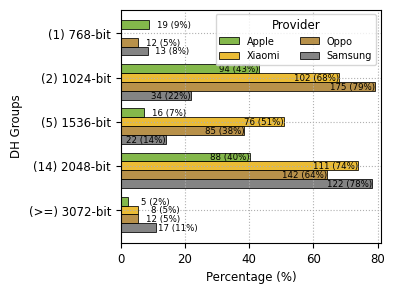

In [56]:
from visualizations.dh_bars.dh_bars import *

visualize_dh_groups(ikev2_dh_group_data,DH_BARS_REPRODUCE)

#### Deprecated Algorithms




In [66]:
from visualizations.deprecated.deprecated_bars import *

deprecated_ike_parameters = {
    "Apple":apple_statistics["deprecated"],
    "Xiaomi":xiaomi_statistics["deprecated"],
    "Oppo":oppo_statistics["deprecated"],
    "Samsung":samsung_statistics["deprecated"]
}

deprecated_ike_parameters



{'Apple': {'ikev2_prf_algo_list': {'algorithms': {1: 10, 3: 0},
   'count': 10,
   'set': 219},
  'ikev2_hash_algo_list': {'algorithms': {1: 11, 3: 0, 4: 0, 6: 0, 7: 0},
   'count': 11,
   'set': 219},
  'ikev2_encr_algo_list': {'algorithms': {1: 0,
    2: 0,
    4: 0,
    5: 0,
    6: 0,
    7: 0,
    8: 0,
    9: 0},
   'count': 0,
   'set': 219},
  'ikev2_dh_group_list': {'algorithms': {1: 19, 2: 94, 5: 16, 22: 0},
   'count': 129,
   'set': 219}},
 'Xiaomi': {'ikev2_prf_algo_list': {'algorithms': {1: 10, 3: 0},
   'count': 10,
   'set': 120},
  'ikev2_hash_algo_list': {'algorithms': {1: 25, 3: 0, 4: 0, 6: 0, 7: 0},
   'count': 25,
   'set': 130},
  'ikev2_encr_algo_list': {'algorithms': {1: 0,
    2: 20,
    4: 0,
    5: 0,
    6: 0,
    7: 0,
    8: 0,
    9: 0},
   'count': 20,
   'set': 126},
  'ikev2_dh_group_list': {'algorithms': {1: 0, 2: 102, 5: 76, 22: 0},
   'count': 115,
   'set': 150}},
 'Oppo': {'ikev2_prf_algo_list': {'algorithms': {1: 7, 3: 0},
   'count': 7,
   'set'

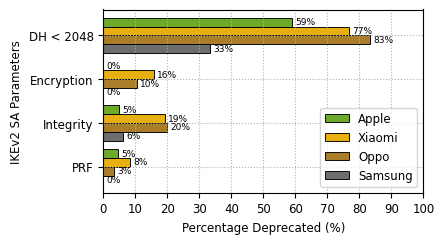

In [67]:
visualize_deprecated_bars(deprecated_ike_parameters,DEPRECATED_REPRODUCE)

#### CDF Rekey Timers

In [69]:
from visualizations.rekey.cdf_rekey_hours import *

rekey_dict = {
    "Apple" : apple_statistics['parsed_ikev2_params']['ikev2_lifetime'],
    "Xiaomi" : xiaomi_statistics['parsed_ikev2_params']['ikev2_sa_rekey_timer_soft_sec'],
    "Oppo" : oppo_statistics['parsed_ikev2_params']['ikev2_sa_rekey_timer_soft_sec'],
    "Samsung" : samsung_statistics['parsed_ikev2_params']['ikev2_lifetime']
    
}

rekey_dict

{'Apple': {'80000': 160,
  '': 526,
  '86400': 53,
  '87000': 2,
  '8640': 1,
  '864000': 1,
  '43200': 1,
  '3600': 1},
 'Xiaomi': {'64800': 122,
  '3000': 13,
  '86600': 1,
  '86400': 51,
  '43200': 7,
  '1500': 1,
  '86200': 3,
  '3600': 7,
  '28800': 5,
  '86300': 1,
  '129500': 1,
  '79200': 1,
  '129400': 2,
  '63000': 1,
  '71000': 1,
  '80000': 2,
  '3900': 2,
  '900': 1,
  '87900': 3,
  '28805': 2,
  '1800': 1,
  '82800': 1,
  '14700': 1,
  '1200': 1},
 'Oppo': {'64800': 176,
  '86400': 66,
  '3000': 6,
  '1500': 4,
  '3600': 4,
  '82800': 4,
  '86220': 7,
  '86200': 3,
  '3001': 2,
  '3420': 1,
  '43200': 11,
  '86300': 15,
  '129500': 1,
  '79200': 1,
  '129400': 1,
  '71000': 1,
  '80000': 1,
  '64700': 1,
  '87900': 6,
  '28700': 2,
  '82600': 1,
  '3500': 1,
  '43020': 2,
  '43100': 2,
  '720': 3,
  '28800': 4,
  '86280': 1,
  '1200': 2,
  '900': 2,
  '7200': 1,
  '32400': 1,
  '82700': 1,
  '21500': 1,
  '14300': 1,
  '77760': 1,
  '3900': 1,
  '1800': 1,
  '14700': 1},


Apple
   seconds  count  cumulative_count       cdf       hours
6     3600      1                 1  0.004566    1.000000
3     8640      1                 2  0.009132    2.400000
5    43200      1                 3  0.013699   12.000000
0    80000    160               163  0.744292   22.222222
1    86400     53               216  0.986301   24.000000
2    87000      2               218  0.995434   24.166667
4   864000      1               219  1.000000  240.000000
Xiaomi
    seconds  count  cumulative_count       cdf      hours
17      900      1                 1  0.004329   0.250000
23     1200      1                 2  0.008658   0.333333
5      1500      1                 3  0.012987   0.416667
20     1800      1                 4  0.017316   0.500000
1      3000     13                17  0.073593   0.833333
7      3600      7                24  0.103896   1.000000
16     3900      2                26  0.112554   1.083333
22    14700      1                27  0.116883   4.083333
8

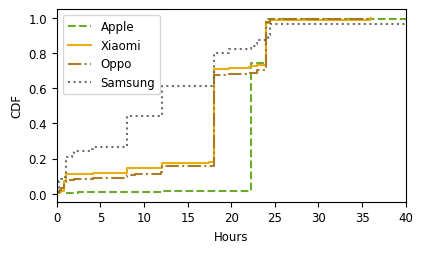

In [79]:
rekey_cdf(rekey_dict,REKEY_REPRODUCE)